# Neural networks

Adapted by <alberto.suarez@uam.es> from 

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

accuracy_train = 0.558  accuracy cv = 0.543 (0.021)           	 accuracy_test = 0.540
accuracy_train = 0.770  accuracy cv = 0.731 (0.019)           	 accuracy_test = 0.737
accuracy_train = 0.916  accuracy cv = 0.887 (0.012)           	 accuracy_test = 0.901
accuracy_train = 0.947  accuracy cv = 0.907 (0.010)           	 accuracy_test = 0.915
accuracy_train = 0.958  accuracy cv = 0.921 (0.011)           	 accuracy_test = 0.917
accuracy_train = 0.976  accuracy cv = 0.931 (0.010)           	 accuracy_test = 0.929
accuracy_train = 0.975  accuracy cv = 0.935 (0.009)           	 accuracy_test = 0.930
accuracy_train = 0.988  accuracy cv = 0.935 (0.013)           	 accuracy_test = 0.937
accuracy_train = 0.995  accuracy cv = 0.937 (0.007)           	 accuracy_test = 0.946
accuracy_train = 0.995  accuracy cv = 0.944 (0.007)           	 accuracy_test = 0.948
accuracy_train = 1.000  accuracy cv = 0.944 (0.009)           	 accuracy_test = 0.949
accuracy_train = 1.000  accuracy cv = 0.946 (0.006)   

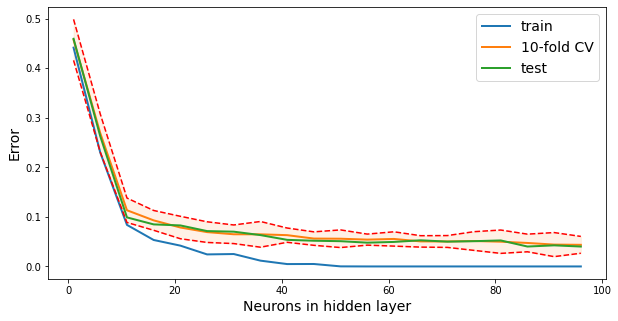

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import (KFold, 
                                     StratifiedKFold, 
                                     cross_val_score, 
                                     train_test_split)
from sklearn import preprocessing
from sklearn import datasets
from sklearn import neural_network
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Comment to view warnings 
import warnings
warnings.filterwarnings('ignore')

# Load or generate a dataset

X, y = datasets.make_hastie_10_2(n_samples=10000)

# Split training and test data

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1.0/3.0)

# Sacle data

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initialize an instance of the neural network

classifier = neural_network.MLPClassifier(solver='lbfgs', max_iter=100)

# Neural network with different hyperparameters
max_n_neurons = 100
n_neurons=  np.arange(1, max_n_neurons+1, 5)

# Initialize arrays to store the results

n_networks = len(n_neurons)
cv_score = np.empty(n_networks)
cv_score_std = np.empty(n_networks)
train_score = np.empty(n_networks)
test_score = np.empty(n_networks)

# Loop over the different values of the hyperparameters

for i, n_neurons_hidden_layer in enumerate(n_neurons):
    
    # Different layer sizes
    classifier.hidden_layer_sizes = (n_neurons_hidden_layer,)
    
    # 10-fold cross-validation within the training data
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    cv_scores = cross_val_score(classifier, X_train, y_train, 
                                scoring='accuracy', cv=skf, n_jobs=1)
   
    cv_score[i] = np.mean(cv_scores)
    cv_score_std[i] = np.std(cv_scores)
    
    classifier.fit(X_train, y_train)
   
    y_train_pred = classifier.predict(X_train)
    train_score[i] = metrics.accuracy_score(y_train,y_train_pred)

    y_test_pred = classifier.predict(X_test)    
    test_score[i] = metrics.accuracy_score(y_test,y_test_pred)

    print('accuracy_train = {:.3f}  accuracy cv = {:.3f} ({:.3f}) \
          \t accuracy_test = {:.3f}'.format(
          train_score[i], cv_score[i], cv_score_std[i], test_score[i]))
    
fontsize = 14
linewidth = 2
plt.figure(figsize=(10, 5))
plt.clf()
ax1, ax2, ax3 = plt.plot(n_neurons[:, np.newaxis], 
                         1 - np.c_[train_score, cv_score, test_score], 
                         linewidth=linewidth)
plt.plot(n_neurons, 1 - cv_score + 2 * cv_score_std, 'r--')
plt.plot(n_neurons, 1 - cv_score - 2 * cv_score_std, 'r--')
plt.fill_between(n_neurons, 
                 1 - cv_score - 2 * cv_score_std, 
                 1 - cv_score + 2 * cv_score_std,
                 color=ax2.get_color(), 
                 alpha=0.1)
plt.ylabel('Error', fontsize=fontsize)
plt.xlabel('Neurons in hidden layer', fontsize=fontsize)
plt.legend(['train', '{}-fold CV'.format(skf.n_splits), 'test'], 
            fontsize=fontsize)
plt.show()